In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline




In [2]:
df_Amazon = pd.read_csv("/Users/chiara/Ironhack/week5/Day1/Exercises/amz_uk_price_prediction_dataset.csv")

# Part 1: Understanding Product Categories

**Business Question:** What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1 Frequency Tables:

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

In [3]:
frequency_table = df_Amazon['category'].value_counts()
print(frequency_table)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [4]:
frequency_table = df_Amazon['category'].value_counts().head(5)
print(frequency_table)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


2 Visualizations:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

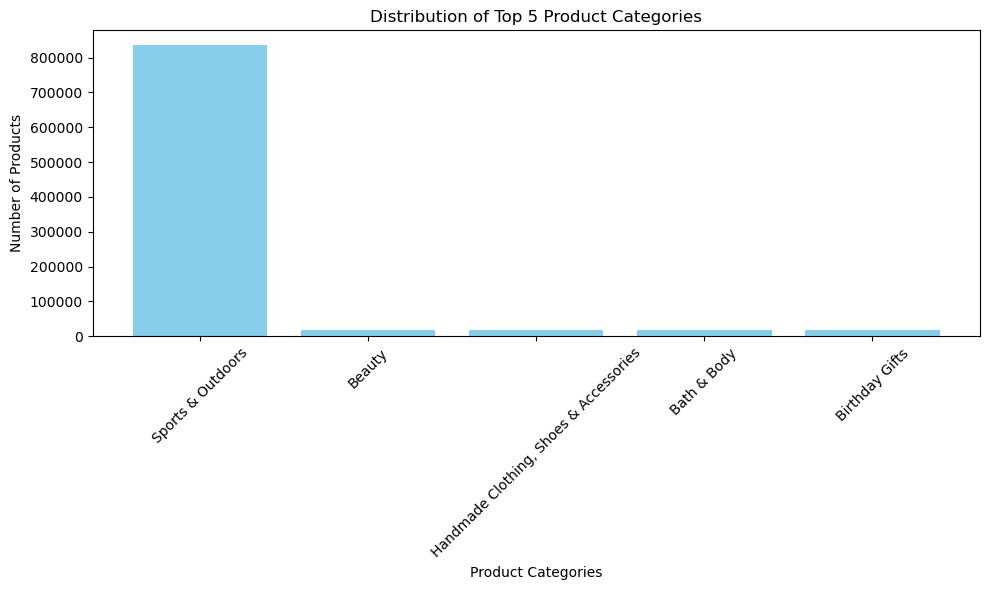

In [5]:
#frequency_table.index: Represents the category names.
#frequency_table.values: Represents the counts of those categories.


plt.figure(figsize=(10, 6))
plt.bar(frequency_table.index, frequency_table.values, color='skyblue')

# Add titles and labels
plt.title('Distribution of Top 5 Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

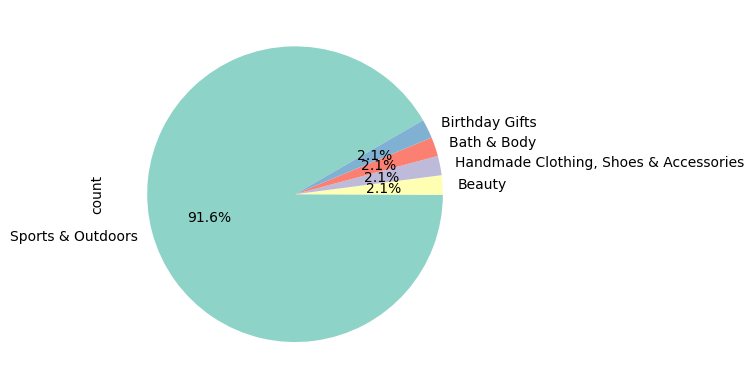

In [6]:
frequency_table.plot.pie(autopct='%.1f%%', startangle=30, colors=sns.color_palette("Set3"));
plt.show()

# Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. Measures of Centrality:

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [7]:
mean_price = df_Amazon['price'].mean()
print (mean_price)

89.24380943923663


In [8]:
median_price = df_Amazon['price'].median()
print (median_price)

19.09


In [9]:
mode_price = df_Amazon['price'].mode()
print (mode_price)

0    9.99
Name: price, dtype: float64


In [10]:
# while most products are priced around £9, there are products with higher prices skewing the average upwards. Given that the sports&outdoor category takes 92% of products counts the avg price is more expensive due to few article bringing up the avg. 

2. Measures of Dispersion:

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [11]:
var_price = df_Amazon['price'].var()
print (var_price)

#A high variance indicates that the prices are widely spread out from the mean

119445.4853225653


In [12]:
std_price = df_Amazon['price'].std()
print (std_price )

#suggests a significant spread of prices around the mean of £89.

345.6088617535223


In [13]:
quantiles_price = df_Amazon['price'].quantile([0.25, 0.5, 0.75])
print (quantiles_price)

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


In [14]:
#The IQR, calculated as Q3 - Q1 (45.99 - 9.99 = 36), provides the range of the middle 50% of data.
#An IQR of 36 suggests reasonable spread in the middle 50% of prices, but compared to the high standard deviation, this suggests that extreme values or outliers heavily influ

#presence of outliers that could be impacting the mean and possibly skewing the price distribution.
# the indicators are std and var being high, few high-priced products raise the overall average.

3. Visualizations:

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

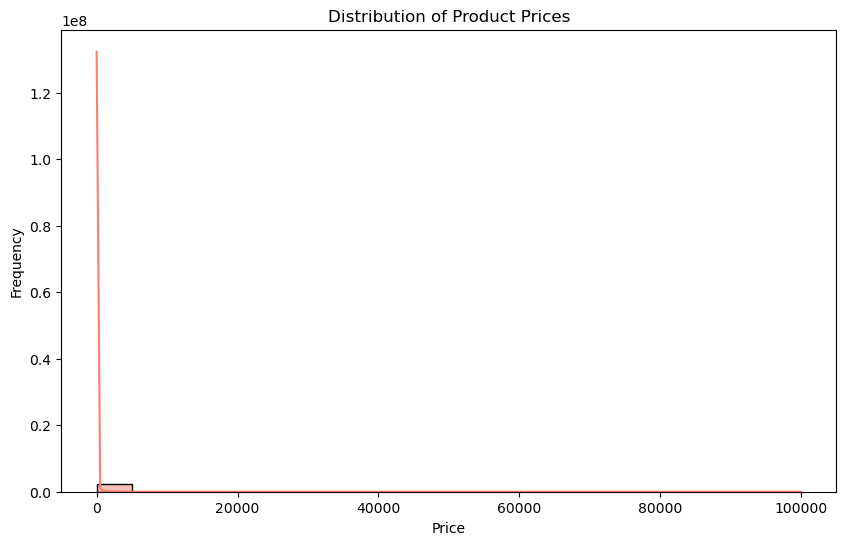

In [26]:
#Skewed Data or Outliers: If the histogram is hard to interpret, it could be due to skewed data or outliers.

fig, axes = plt.subplots(figsize=(10, 6))
sns.histplot(df_Amazon['price'], bins=20, kde=True, color="salmon", ax=axes)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()



axes.set_xlim([df_Amazon['price'].quantile(0.01), df_Amazon['price'].quantile(0.99)])
plt.show()


In [16]:
df_Amazon['price'].describe()  # This will show you the min, max, and quartiles


count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

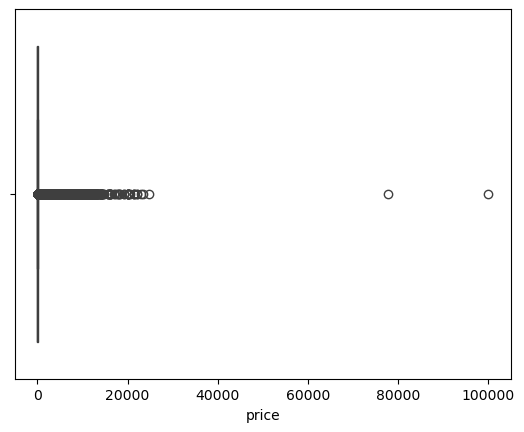

In [17]:
sns.boxplot(x=df_Amazon['price'])
plt.show()

# the boxplot shows a long tail on the right and few outliers that are streching the graph. They are priced higher than the rest 

In [19]:
max_price = df_Amazon['price'].max()
print (max_price)

100000.0


## Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1.Measures of Centrality:

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [28]:
mean_rating = df_Amazon['stars'].mean()
print (mean_rating)

#0-5 rating scale. This might suggest there's a balanced distribution of ratings 

2.152836472966065


In [29]:
median_rating = df_Amazon['stars'].median()
print (median_rating)

0.0


In [30]:
mode_rating = df_Amazon['stars'].mode()
print (mode_rating)

#The mode being 0 indicates that 0 is the most frequently given rating, which might similarly suggest a trend of dissatisfaction or a common default.

0    0.0
Name: stars, dtype: float64


In [31]:
#because of median and mode being 0, it might be due to non-responses defaulting to 0, or perhaps users aren't rating at all, 

2. Measures of Dispersion:

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [32]:
var_rating = df_Amazon['stars'].var()
print (var_rating)

4.81743402976196


In [33]:
std_rating = df_Amazon['stars'].std()
print (std_rating)

2.1948653785054697


In [34]:
quantiles_rating = df_Amazon['stars'].quantile([0.25, 0.5, 0.75])
print (quantiles_rating)

0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


In [35]:
# the var and std suggest a wide vatiation in customer feedback, especially because 50% of customers either rated 0 or didn't rate at all,. hence by dafault is 0

3. Shape of the Distribution:

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

In [37]:
skewness_rating = df_Amazon['stars'].skew()
kurtosis_rating = df_Amazon['stars'].kurtosis()

skewness_rating , kurtosis_rating

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

In [38]:
# skewness is skewed towards the right indicating a positive skewness, which means that the tail on the right side (higher rating) is longer than the left side (lower). the skewness is slightly positive but very close to zero, indicating that the ratings are relatively balanced with a slight tendency towards higher ratings
# kurtosis is negative. The ratings are less likely to have extreme values or outliers.

4. Visualizations:

- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

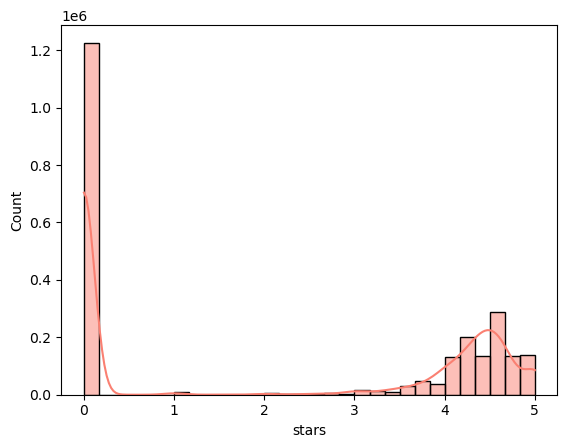

In [39]:
fig, axes = plt.subplots()
sns.histplot(df_Amazon['stars'], kde=True, bins=30, color="salmon", ax=axes);
plt.show()

In [ ]:
# the histo shows that the most common rating is 0 with some outliners close to 4.8 rating 